<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/task_3_dynx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [10]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only the necessary columns
df = df[['v1', 'v2']]  # v1 = label, v2 = message
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Encode labels: spam = 1, ham = 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
X = df['message']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Convert text to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)


In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)


In [15]:
# Create a function to calculate metrics
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Evaluate both models
results_lr = evaluate(y_test, y_pred_lr)
results_nb = evaluate(y_test, y_pred_nb)

# Create comparison table
comparison_df = pd.DataFrame([results_lr, results_nb], index=['Logistic Regression', 'Naive Bayes'])
comparison_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.977578,0.992126,0.840000,0.909747
Naive Bayes,0.983857,0.985294,0.893333,0.937063


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files


In [19]:
# Choose the CSV file from your local machine
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)
df.head()


Saving archive (6).zip to archive (6).zip


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Use Age, Annual Income, and Spending Score for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


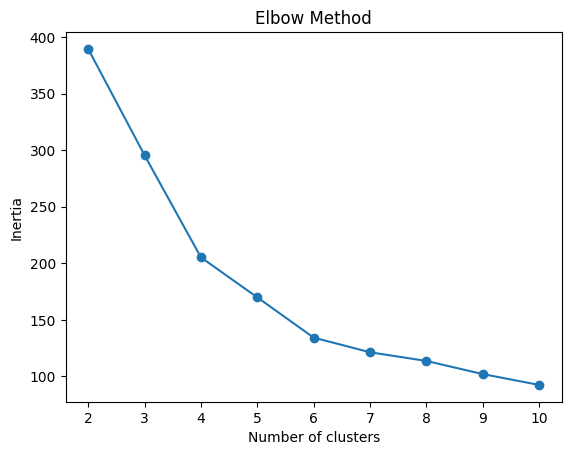

K-Means Silhouette Score: 0.40846873777345605


In [21]:
# Determine optimal K using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the plot, choose optimal k (example: k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)


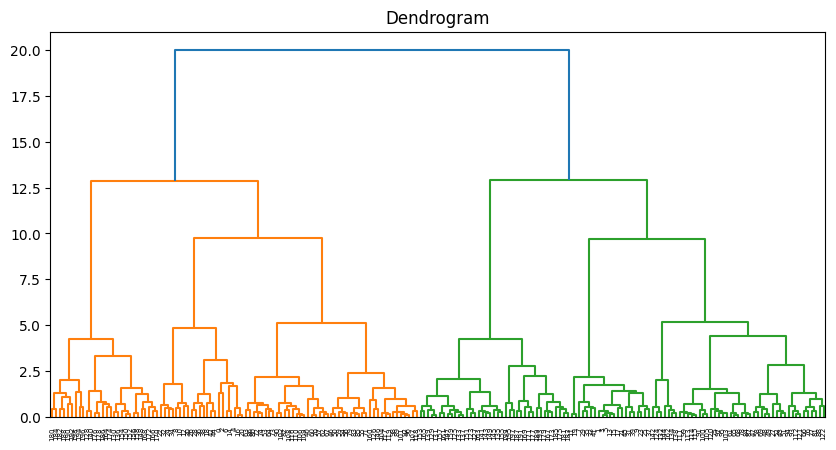

Hierarchical Clustering Silhouette Score: 0.39002826186267214


In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Dendrogram to determine cluster count
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

# Fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')  # remove affinity
hier_labels = hierarchical.fit_predict(X_scaled)

# Silhouette Score
silhouette_hier = silhouette_score(X_scaled, hier_labels)
print("Hierarchical Clustering Silhouette Score:", silhouette_hier)


In [24]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical Clustering'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hier]
})

comparison_df


,Model,Silhouette Score
0,K-Means,0.408469
1,Hierarchical Clustering,0.390028
